In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
# Load IMDB dataset (words encoded as integers)
vocab_size = 10000  # Use top 10,000 words
max_len = 256       # Limit review length to 256 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 11s 1us/step


In [4]:
# Show a sample review (as integers) and label
print("Sample review (as word indices):", x_train[0][:20])
print("Sample label:", y_train[0])

Sample review (as word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
Sample label: 1


In [5]:
# Pad sequences to ensure equal input length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [6]:
# Build the model
model = tf.keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model and store history
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/10


40/40 [==============================] - 3s 34ms/step - loss: 0.6913 - accuracy: 0.5709 - val_loss: 0.6875 - val_accuracy: 0.7378
Epoch 2/10
40/40 [==============================] - 1s 26ms/step - loss: 0.6811 - accuracy: 0.6834 - val_loss: 0.6699 - val_accuracy: 0.7424
Epoch 3/10
40/40 [==============================] - 1s 27ms/step - loss: 0.6522 - accuracy: 0.7749 - val_loss: 0.6293 - val_accuracy: 0.7834
Epoch 4/10
40/40 [==============================] - 1s 25ms/step - loss: 0.5993 - accuracy: 0.8045 - val_loss: 0.5651 - val_accuracy: 0.8054
Epoch 5/10
40/40 [==============================] - 1s 29ms/step - loss: 0.5235 - accuracy: 0.8346 - val_loss: 0.4918 - val_accuracy: 0.8250
Epoch 6/10
40/40 [==============================] - 1s 27ms/step - loss: 0.4467 - accuracy: 0.8577 - val_loss: 0.4281 - val_accuracy: 0.8500
Epoch 7/10
40/40 [==============================] - 1s 26ms/step - loss: 0.3836 - accuracy: 0.8731 - val_loss: 0.3847 - val_accuracy: 0.8594
Epoch 8/10


In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

782/782 [==============================] - 2s 2ms/step - loss: 0.3253 - accuracy: 0.8693

Test Accuracy: 0.87


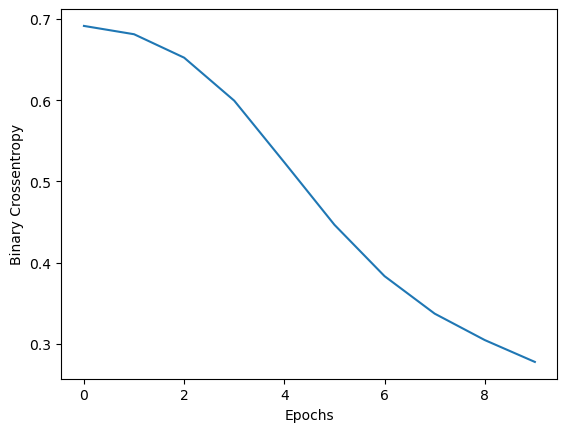

In [10]:
# Plot only training loss without legend or title
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.show()

In [11]:
y_preds = model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


In [12]:
y_preds

array([[0.26837564],
       [0.99643815],
       [0.6396693 ],
       ...,
       [0.14453344],
       [0.44616073],
       [0.5749179 ]], dtype=float32)

In [13]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
tests=[]
for i in y_test:
    tests.append(int(i))

In [15]:
preds=[]
for i in y_preds:
    if i[0]>0.5:
        preds.append(1)
    else:
        preds.append(0)

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print(accuracy_score(tests,preds))
print(precision_score(tests,preds))
print(recall_score(tests,preds))

0.86932
0.8719684151156233
0.86576


In [17]:
mse,mae = model.evaluate(x_test,y_test)

print('MSE ',mse)
print('MAE ',mae)

782/782 [==============================] - 2s 2ms/step - loss: 0.3253 - accuracy: 0.8693
MSE  0.3253220021724701
MAE  0.8693199753761292
